In [1]:
import torch
from torch import distributions as D

In [2]:
N_MIX = 4
N_DISTS = 5

In [3]:
params = torch.randint(1, 8, (N_MIX, N_DISTS, 2)).float()
#params = torch.tensor([[2, 2], [3, 2], [4, 2], [5, 2], [6, 2]]).float()
mix = torch.distributions.Categorical(torch.rand((N_MIX, N_DISTS)))
gammas = torch.distributions.Gamma(params[:,:,0], params[:,:,1])

mixture = torch.distributions.MixtureSameFamily(mix, gammas)

In [12]:
points = torch.rand(10,N_MIX)

In [13]:
points

tensor([[0.9715, 0.3919, 0.8707, 0.5513],
        [0.5208, 0.3245, 0.9893, 0.8816],
        [0.6671, 0.6351, 0.3454, 0.7311],
        [0.8799, 0.6627, 0.9251, 0.5917],
        [0.3186, 0.4589, 0.0034, 0.9824],
        [0.5647, 0.4841, 0.8598, 0.6497],
        [0.8269, 0.5177, 0.3345, 0.9468],
        [0.5644, 0.9277, 0.1495, 0.0810],
        [0.6627, 0.7283, 0.5710, 0.1167],
        [0.3008, 0.7852, 0.4109, 0.7014]])

In [15]:
probs =torch.exp(mixture.log_prob(points))

In [4]:
print(gammas.sample().shape, mix.sample().shape)

torch.Size([4, 5]) torch.Size([4])


torch.Size([200, 4])


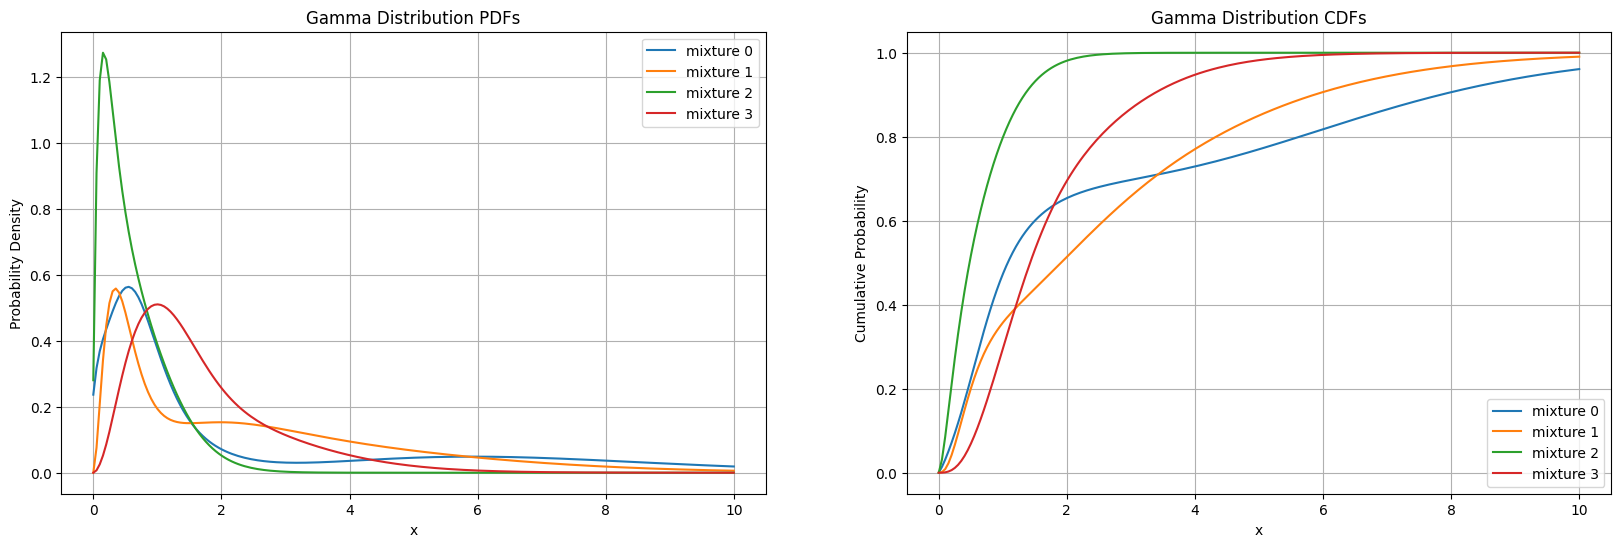

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(0, 10, 200).view(-1, 1).repeat(1, N_MIX)
print(x.shape)
pdfs = mixture.log_prob(x).exp()
cdfs = mixture.cdf(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

for i in range(N_MIX):
    ax1.plot(x[:,i].numpy(), pdfs[:,i].numpy(), label=f'mixture {i}')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title('Gamma Distribution PDFs')
ax1.legend()
ax1.grid(True)

for i in range(N_MIX):
    ax2.plot(x[:,i].numpy(), cdfs[:,i].numpy(), label=f'mixture {i}')
ax2.set_xlabel('x') 
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Gamma Distribution CDFs')
ax2.legend()
ax2.grid(True)

plt.show()
